In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import numpy as np

In [37]:
dataset = pd.read_csv('GOOG.csv')

In [38]:
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [39]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [40]:
dataset.shape

(4706, 7)

In [41]:
dataset.drop('Adj Close', axis=1, inplace=True)

In [42]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512


In [43]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [44]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4706 non-null   datetime64[ns]
 1   Open    4706 non-null   float64       
 2   High    4706 non-null   float64       
 3   Low     4706 non-null   float64       
 4   Close   4706 non-null   float64       
 5   Volume  4706 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 220.7 KB


In [46]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4706.000000,4706.000000,4706.000000,4706.000000,4.706000e+03
mean,38.667228,39.073746,38.269589,38.679520,1.220106e+08
std,35.815273,36.223129,35.433942,35.833894,1.526586e+08
min,2.470490,2.534002,2.390042,2.490913,1.584340e+05
25%,12.685639,12.810981,12.529100,12.663223,2.947856e+07
50%,25.762856,25.978670,25.568490,25.744663,6.629778e+07
75%,55.059624,55.563124,54.450375,55.005249,1.517637e+08
max,151.863495,152.100006,149.887497,150.709000,1.650833e+09


In [47]:
print(len(dataset))

4706


<Axes: >

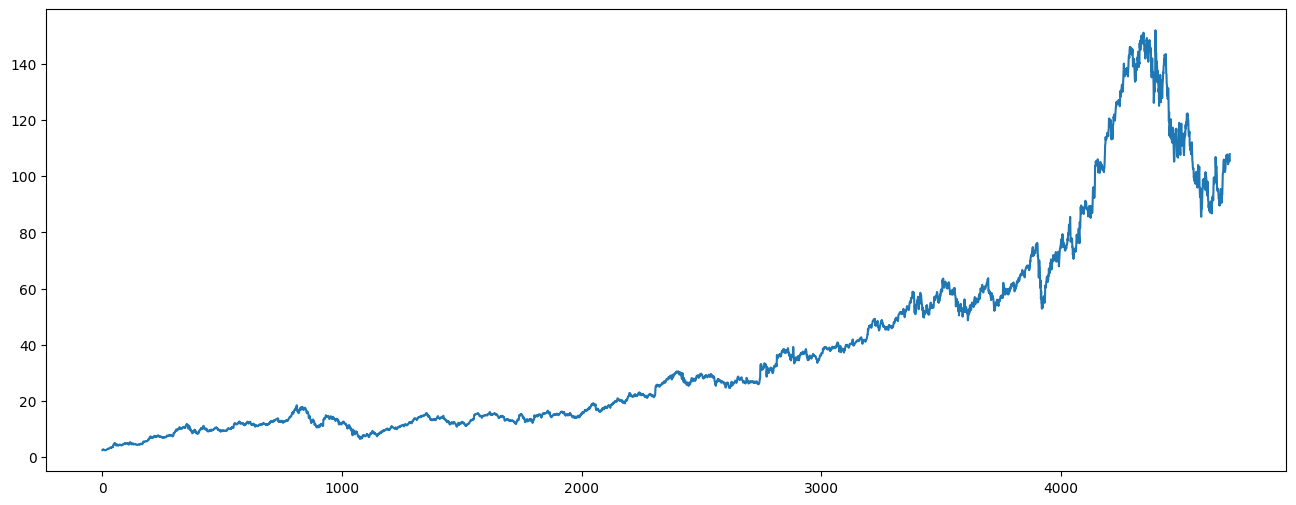

In [48]:
dataset['Open'].plot(figsize=(16,6))

In [49]:
x = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=0)

In [54]:
X_train.shape

(3529, 4)

In [55]:
X_test.shape

(1177, 4)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [59]:
print(regressor.coef_)

[-6.50691015e-01  8.13342678e-01  8.37260188e-01 -1.33009159e-11]


In [60]:
print(regressor.intercept_)

0.017999349039911294


In [61]:
predicated = regressor.predict(X_test)

In [63]:
X_test

,Open,High,Low,Volume
2106,17.434650,17.697914,17.335024,80195470
3585,52.164501,52.830250,51.557499,30274000
2920,36.839500,36.949501,36.625000,26026000
2049,19.195799,19.287207,19.053831,109846193
2011,16.125059,16.442122,16.106628,131205956
...,...,...,...,...
2790,31.839500,32.000000,31.351000,102668000
1366,14.059800,14.211731,13.321567,273035583
1651,14.581346,14.610735,14.432155,125592995
546,10.535261,10.579097,10.398524,241594173


In [64]:
predicated.shape

(1177,)

In [65]:
dframe = pd.DataFrame(Y_test, predicated)

In [67]:
dfr = pd.DataFrame({'Actual Price':Y_test, 'Predicated Price':predicated})
dfr

,Actual Price,Predicated Price
2106,17.618462,17.580757
3585,51.802502,52.210763
2920,36.676498,36.763782
2049,19.119585,19.166127
2011,16.438635,16.382341
...,...,...
2790,31.462500,31.574867
1366,13.698903,13.578407
1651,14.453325,14.495381
546,10.443605,10.470287


In [68]:
regressor.score(X_test, Y_test)

0.999909807831293

In [69]:
import math
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, predicated) )

Mean Absolute Error:  0.17299196099063147


In [70]:
print("Mean Square Error: ", metrics.mean_squared_error(Y_test, predicated) )

Mean Square Error:  0.11503301832649981


In [71]:
print("Root Mean Square Error: ", math.sqrt(metrics.mean_squared_error(Y_test, predicated)) )

Root Mean Square Error:  0.3391651785288399


In [100]:
X = np.array(dfr)

In [101]:
X

array([[17.618462  , 17.58075679],
       [51.802502  , 52.21076287],
       [36.676498  , 36.763782  ],
       ...,
       [14.453325  , 14.49538115],
       [10.443605  , 10.47028749],
       [12.311852  , 12.34162325]])

In [102]:
error = 0
length = len(X)

for i in range(length):
    error = abs(X[i][0]*1000 - X[i][1]*1000)/(X[i][0])

error = error/length
error = error*100
error

0.20544577042573164

In [103]:
from sklearn.metrics import f1_score

In [104]:
def calculate_f1_score(actual_prices, predicted_prices):
    # Convert the price arrays into binary labels (1: increase, 0: decrease)
    actual_labels = [1 if actual_prices[i+1] > actual_prices[i] else 0 for i in range(len(actual_prices) - 1)]
    predicted_labels = [1 if predicted_prices[i+1] > predicted_prices[i] else 0 for i in range(len(predicted_prices) - 1)]
    
    # Calculate the F1-score
    f1 = f1_score(actual_labels, predicted_labels)
    return f1

In [105]:
Y = []
x = []
for i in range(length):
    Y.append(X[i][1])
    x.append(X[i][0])

In [106]:
f1_score = calculate_f1_score(x, Y)
print("F1-score:", f1_score)

F1-score: 1.0


In [118]:
len(Y)

In [127]:
graph = dfr.head(10)

<Axes: >

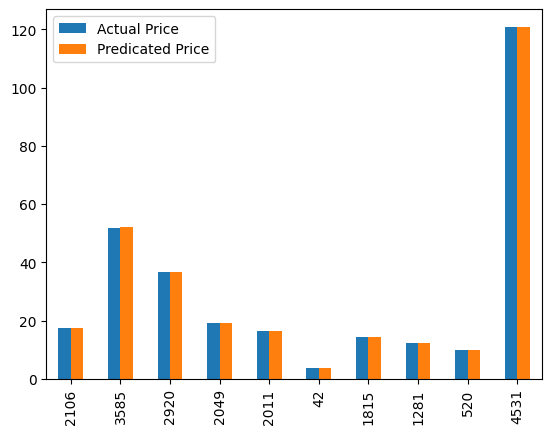

In [129]:
graph.plot(kind='bar')